# ДЗ №7 по теме перестройки в геноме

В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

### Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).  
Симуляция заключается в следующем:  
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

In [18]:
import random
import matplotlib.pyplot as plt

def reverse_part(sequence, start, end):
    sequence[start : end] = [-sequence[i] for i in range(end-1, start-1, -1)]
    return sequence

def random_breakage_model(n, k):
    sequence = [i for i in range(1, n+1)]

    for _ in range(k):
        break_points = sorted(random.sample(range(1, 1000), 2))
        start, end = break_points
        sequence= reverse_part(sequence, start, end)
    return sequence


### Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [20]:
def sort_swap(seq):
    n = len(seq)
    count = 0
    for i in range(n):
        ind = i + 1
        if seq[i] == ind:
            continue
        j = ind
        while j < n and seq[j - 1] not in [ind, -ind]:
            j += 1
        seq = reverse_part(seq, ind - 1, j)
        count += 1
        if seq[i] == -ind:
            seq[i] = -seq[i]
            count += 1
    return count

seq = [2, -4, -3, 5, -8, -7, -6, 1]
count = sort_swap(seq)
print(f"Отсортированная последовательность: {seq}")
print(f"Количество операций разворота: {count}")

Отсортированная последовательность: [1, 2, 3, 4, 5, 6, 7, 8]
Количество операций разворота: 5


### Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния.  Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.  
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).
Постарайтесь объяснить, что происходит.

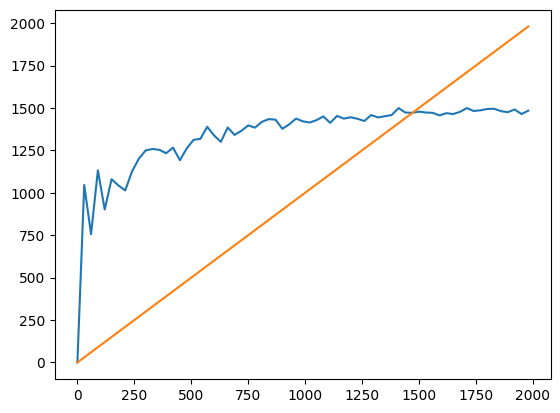

In [41]:
n = 1000
k_s = [i for i in range(0, 2*n + 1, 30)]
counts = [0 for _ in range(len(k_s))]
diff = [0 for i in range(len(k_s))]
for i in range(len(k_s)):
    sequence = random_breakage_model(n, k_s[i])
    counts[i] = sort_swap(sequence)
    diff[i] = (k_s[i] - counts[i])

plt.plot( k_s, counts)
plt.plot(k_s, k_s)


В идеале мы должны вообще просто получать ровную линию, но по графику видно, что после 1250 переворотов мы выходим на своеобразное "плато". То есть увелечения количества переворотов с какого-то момента не сильно влияет на результат. Возможно это происходит из-за того, что в среднем жадный алгоритм работает лучше, чем мы предполагаем

In [43]:
print(diff)
for i in range(len(diff)):
    if abs(diff[i]) > 25:
        continue
    else:
        print(i)

[0, -1016, -696, -1042, -781, -930, -863, -804, -886, -931, -950, -928, -893, -843, -846, -742, -781, -802, -778, -819, -738, -670, -725, -651, -645, -647, -604, -608, -594, -561, -477, -473, -477, -431, -394, -378, -370, -302, -313, -267, -245, -206, -163, -168, -124, -101, -78, -89, -33, -1, 22, 57, 89, 134, 151, 186, 203, 211, 258, 284, 306, 335, 379, 415, 429, 486, 496]
0
49
50


Мы видим, что разница меньше, чем на 25 превосходит всего в двух точках, остальное время ошибка остается больше. Причем до этого значения жадный алгоритм возвращает больше, а после них уже меньше